数据读取与展示

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import sklearn 
import pandas as pd 
import os 
import sys 
import time 
import tensorflow as tf 
from tensorflow import keras

In [2]:
#fashion_minist = keras.datasets.fashion_mnist
fashion_minist = keras.datasets.mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_minist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train),np.min(x_train))

255 0


In [4]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.8209424 -0.4241323


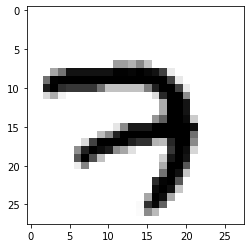

In [6]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

show_single_image(x_train[0])

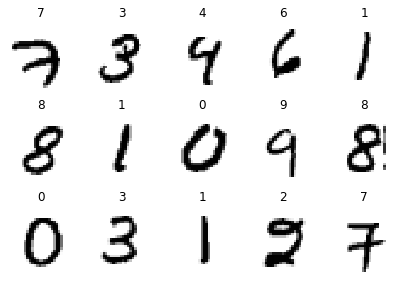

In [7]:
def show_images(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data)==len(y_data)
    assert n_rows*n_cols<len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()
class_names=['0','1','2','3','4','5','6','7','8','9']
show_images(3,5,x_train,y_train,class_names)

模型构建

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd",metrics=["accuracy"])


In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3510 - accuracy: 0.8987 - val_loss: 0.1959 - val_accuracy: 0.9452
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1703 - accuracy: 0.9504 - val_loss: 0.1473 - val_accuracy: 0.9576
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1265 - accuracy: 0.9635 - val_loss: 0.1196 - val_accuracy: 0.9666
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0999 - accuracy: 0.9714 - val_loss: 0.1070 - val_accuracy: 0.9684
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0814 - accuracy: 0.9772 - val_loss: 0.0987 - val_accuracy: 0.9718
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0679 - accuracy: 0.9807 - val_loss: 0.0918 - val_accuracy: 0.9738
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9841 - val_loss: 0.0851 - val_accuracy:

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)


数据归一化

In [13]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9756


[0.0755981057882309, 0.975600004196167]

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

for i in range(20):
    model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd",metrics=["accuracy"])

In [15]:
model.layers

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [17]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 2.2575 - accuracy: 0.1480 - val_loss: 1.9294 - val_accuracy: 0.2146
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 1.3380 - accuracy: 0.4463 - val_loss: 0.8457 - val_accuracy: 0.6608
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5617 - accuracy: 0.8352 - val_loss: 0.2555 - val_accuracy: 0.9408
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2314 - accuracy: 0.9366 - val_loss: 0.2023 - val_accuracy: 0.9484
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1621 - accuracy: 0.9551 - val_loss: 0.1926 - val_accuracy: 0.9498
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1248 - accuracy: 0.9655 - val_loss: 0.1648 - val_accuracy: 0.9592
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1031 - accuracy: 0.9717 - val_loss: 0.1285 - val_ac

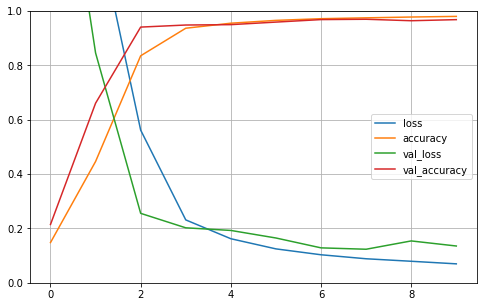

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1488 - accuracy: 0.9652


[0.14883717894554138, 0.9652000069618225]